# Book ratings

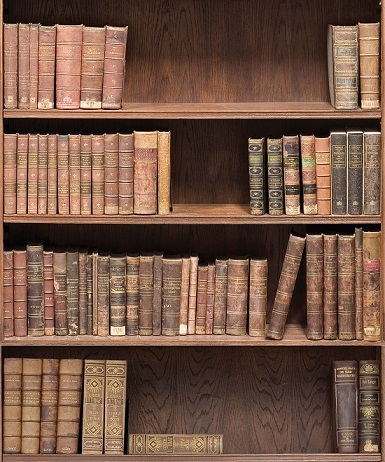

*“A reader lives a thousand lives before he dies, said Jojen. <br> The man who never reads lives only one.” <br> <br>
― George R.R. Martin, A Dance with Dragons*

# Contents

* Acknowledgemnts
* Importing packages, loading datasets
* Data cleaning
* Exploratory data analysis
* Normalizing data for clustering
* K-means clustering

# Acknowledgements

Thanks Ruchi Bhatia for uploading this dataset, furthermore Vijay Choudhary and Shruti_Iyyer for inspiration.

# Importing packages, loading dataset

In [ ]:
# importing python packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Users
u_cols = ['user_id', 'location', 'age']
users = pd.read_csv('../input/bookcrossing-dataset/Book reviews/BX-Users.csv', sep=';', names=u_cols, encoding='latin-1',low_memory=False)

#Books
i_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
items = pd.read_csv('../input/bookcrossing-dataset/Book reviews/BX-Books.csv', sep=';', names=i_cols, encoding='latin-1',low_memory=False)

#Ratings
r_cols = ['user_id', 'isbn', 'rating']
ratings = pd.read_csv('../input/bookcrossing-dataset/Book reviews/BX-Book-Ratings.csv', sep=';', names=r_cols, encoding='latin-1',low_memory=False)

In [ ]:
users.head()

In [ ]:
items.head()

In [ ]:
ratings.head()

# Data cleaning

In [ ]:
# merging

df = pd.merge(users, ratings, on = 'user_id')
df = pd.merge(df, items, on = 'isbn')
df.head()

In [ ]:
df.info()

In [ ]:
# dropping irrelevant columns

df = df.drop(columns = ['img_s', 'img_m', 'img_l'])
df = df.drop(df.index[0])
df.head()

In [ ]:
# detecting missing values

df.isnull().sum()

In [ ]:
# dropping missing values

df = df.dropna()

In [ ]:
# dropping duplicates

df.drop_duplicates(inplace = True)

 # Exploratory data analysis

In [ ]:
# location

df['location'].value_counts().to_frame()

In [ ]:
# publisher

df['publisher'].value_counts().to_frame()

In [ ]:
# checking value counts in column 'year_of_publication'

df['year_of_publication'].value_counts()

In [ ]:
# some wierd things have been found, therefore checking the list of values is needed 

df.year_of_publication.unique()

In [ ]:
# deleting rows with wrong values in column 'year_of_publication'

wrong_values = df[df['year_of_publication'].isin(['\\"Freedom Song\\""', 'John Peterman', '2030', 'Frank Muir', 'Isadora Duncan', '2050', 'Karen T. Whittenburg', 
                                                  'ROBERT A. WILSON', '2038', 'George H. Scherr', 'Stan Berenstain', '2026', 'Francine Pascal', '2021', 'Gallimard',
                                                  'DK Publishing Inc', '2037', 'Luella Hill', 'Salvador de Madariaga', 'K.C. Constantine', 'Bart Rulon', 'Alan Rich',
                                                  'Jules Janin', '2024'])].index
df.drop(wrong_values, inplace = True)

In [ ]:
# converting the columns below to the proper type (integer)

df['user_id'] = df['user_id'].astype('int')
df['age'] = df['age'].astype('int')
df['rating'] = df['rating'].astype('int')
df['year_of_publication'] = df['year_of_publication'].astype('int')

df.dtypes

In [ ]:
df['book_author'].value_counts().to_frame()

In [ ]:
df['book_title'].value_counts().to_frame()

In [ ]:
df.describe()

In [ ]:
df.corr()

In [ ]:
sns.pairplot(df)

In [ ]:
df_best_authors = df.groupby(by = ['book_author', 'book_title']).mean().sort_values(by = ['rating'], ascending = False)
df_best_authors.head(20)

In [ ]:
df_best_books = df.groupby(by = ['book_title']).mean().sort_values(by = ['rating'], ascending = False)
df_best_books.head(20)

# Normalizing data for clustering

In [ ]:
# normalizing over the standard deviation

from sklearn.preprocessing import StandardScaler

clus_df = df[['age', 'rating', 'year_of_publication']]

X = clus_df.values[:,1:]
X = np.nan_to_num(X)
clus_df = StandardScaler().fit_transform(X)
clus_df

# K-means clustering

In [ ]:
# searching for the right K with the elbow method

from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(clus_df)
    
    wcss.append(kmeans.inertia_)

In [ ]:
# depicting

plt.figure(figsize = (12, 8))
sns.lineplot(range(1, 11), wcss, marker = 'o', color = 'darkorchid')

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('The Elbow Method', fontsize = 18)
plt.xlabel('Number of clusters', fontsize = 16)
plt.ylabel('Within Cluster Sum of Squares', fontsize = 16)

plt.show()

We can conclude that the optimal number of clusters is 3.

In [ ]:
# fitting and predicting

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
#assign labels to each row

labels = kmeans.labels_
df['group'] = labels
df.head()

In [ ]:
df.groupby('group').mean()

In [ ]:
# depicting clusters

plt.figure(figsize = (12, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'deepskyblue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'midnightblue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'slategray', label = 'Cluster 3')

plt.title('Clusters of ratings', fontsize = 16)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Year of publication', fontsize = 14)
plt.legend()
plt.show()